In [214]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os
import operator
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')


plt.rcParams['axes.unicode_minus'] = False

In [84]:
RF = pd.read_csv("randomforest.csv")["target"]
ADA = pd.read_csv("adaboost.csv")["target"]
LR = pd.read_csv("LogisticRegression.csv")["target"]
CB = pd.read_csv("catboost.csv")["target"]
XGB = pd.read_csv("xgb.csv")["target"]
H2O = pd.read_csv("H2O_AutoML_3600s.csv")["target"]

submission = pd.read_csv("xgb.csv")

In [85]:
ensemble = pd.concat([RF,ADA,LR,CB,XGB,H2O],axis=1)
ensemble.columns=["RandomForest","ADAboost","LogisticRegression","CatBoost","XGBoost","H2O"]
ensemble

,RandomForest,ADAboost,LogisticRegression,CatBoost,XGBoost,H2O
0,0.382064,0.499736,0.340330,0.291419,0.524085,0.364368
1,0.442970,0.499984,0.694961,0.705920,0.657054,0.650616
2,0.341106,0.499374,0.120768,0.130150,0.355772,0.179299
3,0.416183,0.499867,0.436699,0.482983,0.591362,0.414706
4,0.750823,0.500287,0.868892,0.836071,0.875885,0.908977
...,...,...,...,...,...,...
199995,0.197771,0.499845,0.289540,0.323130,0.359013,0.231223
199996,0.259804,0.499610,0.128385,0.123358,0.373237,0.153523
199997,0.166162,0.499431,0.324080,0.279669,0.264917,0.323271
199998,0.378563,0.499996,0.598150,0.523217,0.595831,0.558180


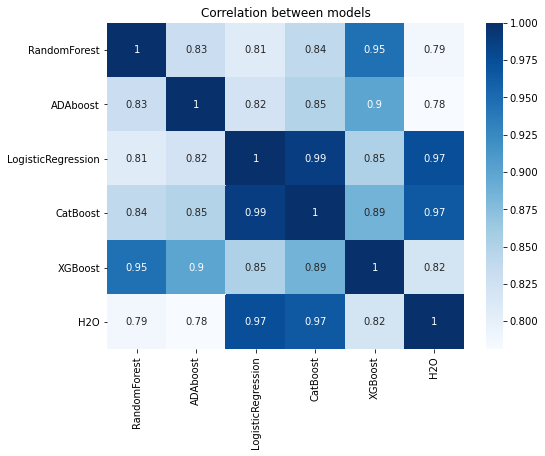

In [86]:
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [88]:
def return_average(t,model_name1,model_name2):
    if t=="산술":
        df = (ensemble[model_name1]+ensemble[model_name2])/2
    
    elif t=="가중":
        score = {"RandomForest" : 0.75168, 6등
        "ADAboost" : 0.76189, 5등
        "LogisticRegression" : 0.80850, 1등
        "CatBoost" : 0.80486, 2등
        "XGBoost" : 0.76703, 4등
        "H2O" : 0.80175} 3등
        
        
        df = (ensemble[model_name1]*score[model_name1]+ensemble[model_name2]*score[model_name2])/(score[model_name1]+score[model_name2])
    elif t=="기하":
        df = np.sqrt(ensemble[model_name1]*ensemble[model_name2])
    elif t == "멱" :
        df = np.sqrt((ensemble[model_name1]**2 + ensemble[model_name2]**2)/2)
        
    return pd.DataFrame(df,columns=[t + "target"])
        

In [89]:
model_name = ["RandomForest","ADAboost","LogisticRegression","CatBoost","XGBoost","H2O"]
model_size = len(model_name)

In [90]:
#corr쌍 찾기
L=[]
for j in range(model_size):
    for i in range(j+1,model_size):
        corr_value=ensemble.corr().iloc[:,j][i]
        L.append([corr_value,(model_name[i],model_name[j])])
        
L.sort()

In [91]:
L

[[0.7812093824030069, ('H2O', 'ADAboost')],
 [0.787525846403638, ('H2O', 'RandomForest')],
 [0.8081789134558834, ('LogisticRegression', 'RandomForest')],
 [0.8209466651690824, ('H2O', 'XGBoost')],
 [0.8216483262247803, ('LogisticRegression', 'ADAboost')],
 [0.8306042141346626, ('ADAboost', 'RandomForest')],
 [0.8400822539209989, ('CatBoost', 'RandomForest')],
 [0.8487673196719462, ('CatBoost', 'ADAboost')],
 [0.8524236717180416, ('XGBoost', 'LogisticRegression')],
 [0.8856418910194414, ('XGBoost', 'CatBoost')],
 [0.8999805258739775, ('XGBoost', 'ADAboost')],
 [0.9455368926787525, ('XGBoost', 'RandomForest')],
 [0.9652627270817741, ('H2O', 'CatBoost')],
 [0.9746659127708247, ('H2O', 'LogisticRegression')],
 [0.9875763016268599, ('CatBoost', 'LogisticRegression')]]

1. 관계가 가장 작은
2. 성능이 가장 좋은
3. 성능은 좀 떨어지는 모델이 들어가지만 상관관계가 2번째로 적은

# 성능이 가장 좋은 것(1)과 상관관계가 첫번째로 높은 모델(5) (성능이 2위)

In [95]:
for corr_val,names in L[14:15]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'CB|LRsubmission.csv',header=True, index=False)

CatBoost LogisticRegression


,산술target
0,0.315875
1,0.700441
2,0.125459
3,0.459841
4,0.852482
...,...
199995,0.306335
199996,0.125871
199997,0.301875
199998,0.560684


,가중target
0,0.315930
1,0.700428
2,0.125449
3,0.459788
4,0.852519
...,...
199995,0.306297
199996,0.125877
199997,0.301925
199998,0.560768


,기하target
0,0.314927
1,0.700419
2,0.125372
3,0.459258
4,0.852324
...,...
199995,0.305874
199996,0.125846
199997,0.301057
199998,0.559431


,멱target
0,0.316820
1,0.700462
2,0.125547
3,0.460423
4,0.852640
...,...
199995,0.306795
199996,0.125896
199997,0.302690
199998,0.561934


CB | LR 가중  
score : 0.80762   
CB | LR 산술   
score : 0.80762  
CB | LR 멱  
score : 0.80758  
CB | LR 기하  
score : 0.80765  


--previous--  
"LogisticRegression" : 0.80850  
"CatBoost" : 0.80486  

1. 차이는 적지만 성능 낮아짐  
2. CB | LR 기하 채택 -> 0.80765  


# 성능이 가장 좋은 것(1)과 상관관계가 가장 낮은 모델(1) (성능이 6위)

In [98]:
for corr_val,names in L[2:3]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'LR|RFsubmission.csv',header=True, index=False)

LogisticRegression RandomForest


,산술target
0,0.361197
1,0.568966
2,0.230937
3,0.426441
4,0.809858
...,...
199995,0.243656
199996,0.194094
199997,0.245121
199998,0.488357


,가중target
0,0.360437
1,0.573554
2,0.226925
3,0.426815
4,0.812008
...,...
199995,0.245327
199996,0.191701
199997,0.247997
199998,0.492355


,기하target
0,0.360594
1,0.554840
2,0.202965
3,0.426318
4,0.807703
...,...
199995,0.239296
199996,0.182633
199997,0.232056
199998,0.475855


,멱target
0,0.361799
1,0.582750
2,0.255869
3,0.426564
4,0.812006
...,...
199995,0.247939
199996,0.204915
199997,0.257524
199998,0.500547


RF | LR 가중  
score : 0.80040  
RF | LR 기하  
score : 0.80075  
RF | LR 산술  
score : 0.79963  
RF | LR  멱  
score : 0.79787   

--previous--  
"LogisticRegression" : 0.80850  
"RandomForest" : 0.75168  
    
1. RF | LR 기하 채택 -> score : 0.80075
2. 단일 모델 성능이 가장좋은 LR보단 떨어짐

# 성능이 가장 좋은 것(1)과 그다음으로 두번째로 상관관계가 낮은(2) 모델 (성능이 5등)

In [101]:
for corr_val,names in L[4:5]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'LR|ADAsubmission.csv',header=True, index=False)

LogisticRegression ADAboost


,산술target
0,0.420033
1,0.597473
2,0.310071
3,0.468283
4,0.684590
...,...
199995,0.394693
199996,0.313997
199997,0.411755
199998,0.549073


,가중target
0,0.417668
1,0.600366
2,0.304453
3,0.467346
4,0.690060
...,...
199995,0.391572
199996,0.308488
199997,0.409153
199998,0.550530


,기하target
0,0.412402
1,0.589466
2,0.245578
3,0.467217
4,0.659315
...,...
199995,0.380428
199996,0.253263
199997,0.402313
199998,0.546876


,멱target
0,0.427528
1,0.605374
2,0.363290
3,0.469347
4,0.708965
...,...
199995,0.408460
199996,0.364755
199997,0.420986
199998,0.551262


ADA | LR 가중
score : 0.80850
ADA | LR 기하
score : 0.80850
ADA | LR 산술
score : 0.80850
ADA | LR  멱
score : 0.80850

--previous--
"LogisticRegression" : 0.80850
"ADAboost" : 0.76189
    
1. ADA | LR averaging 모두같은결과 -> score : 0.80850
2. 단일 모델 성능이 가장좋은 LR과 같은결과

# 성능이 가장 좋은 것(1)과 상관관계가 세번째로 높은 모델(3) (성능이 4등 )

In [103]:
for corr_val,names in L[8:9]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'LR|XGBsubmission.csv',header=True, index=False)

XGBoost LogisticRegression


,산술target
0,0.432208
1,0.676008
2,0.238270
3,0.514030
4,0.872389
...,...
199995,0.324277
199996,0.250811
199997,0.294498
199998,0.596991


,가중target
0,0.429789
1,0.676507
2,0.235178
3,0.511995
4,0.872297
...,...
199995,0.323362
199996,0.247588
199997,0.295277
199998,0.597021


,기하target
0,0.422329
1,0.675742
2,0.207282
3,0.508180
4,0.872382
...,...
199995,0.322411
199996,0.218901
199997,0.293009
199998,0.596990


,멱target
0,0.441865
1,0.676273
2,0.265668
3,0.519815
4,0.872396
...,...
199995,0.326132
199996,0.279095
199997,0.295980
199998,0.596992


In [ ]:
XGB | LR 가중
score : 0.79943
XGB | LR 기하
score : 0.80301
XGB | LR 산술
score : 0.79892
XGB | LR  멱
score : 0.79412

--previous--
"LogisticRegression" : 0.80850
"XGBoost" : 0.76703
    
1. XGB | LR 기하 -> score : 0.80301 
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

# 성능이 가장 좋은 것(1)과 상관관계가 두번째로 높은 모델(4) (성능이 3등)

In [105]:
for corr_val,names in L[13:14]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'LR|H2Osubmission.csv',header=True, index=False)

H2O LogisticRegression


,산술target
0,0.352349
1,0.672789
2,0.150034
3,0.425703
4,0.888935
...,...
199995,0.260381
199996,0.140954
199997,0.323675
199998,0.578165


,가중target
0,0.352299
1,0.672882
2,0.149911
3,0.425749
4,0.888851
...,...
199995,0.260504
199996,0.140901
199997,0.323677
199998,0.578249


,기하target
0,0.352144
1,0.672423
2,0.147152
3,0.425561
4,0.888709
...,...
199995,0.258744
199996,0.140392
199997,0.323675
199998,0.577820


,멱target
0,0.352554
1,0.673154
2,0.152861
3,0.425845
4,0.889161
...,...
199995,0.262009
199996,0.141513
199997,0.323675
199998,0.578511


H2O | LR 가중
score : 0.80682
H2O  | LR 기하
score : 0.80681
H2O  | LR 산술
score : 0.80681
H2O  | LR  멱
score : 0.80678

--previous--
"LogisticRegression" : 0.80850
"H2O " : 0.80175
    
1. H2O | LR 가중 -> score : 0.80682
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

성능이 가장 좋은 모델과 모두 해봣을 때 결론 :

--previous--
"LogisticRegression" : 0.80850
"CatBoost" : 0.80486

1. 차이는 적지만 성능 낮아짐
2. CB | LR 기하 채택 -> 0.80765

--previous--
"LogisticRegression" : 0.80850
"H2O " : 0.80175
1. H2O | LR 가중 -> score : 0.80682
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

--previous--
"LogisticRegression" : 0.80850
"XGBoost" : 0.76703
    
1. XGB | LR 기하 -> score : 0.80301 
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

--previous--
"LogisticRegression" : 0.80850
"ADAboost" : 0.76189
    
1. ADA | LR averaging 모두같은결과 -> score : 0.80850
2. 단일 모델 성능이 가장좋은 LR과 같은결과

--previous--
"LogisticRegression" : 0.80850
"RandomForest" : 0.75168
    
1. RF | LR 기하 채택 -> score : 0.80075
2. 단일 모델 성능이 가장좋은 LR보단 떨어짐 


----1등 : ADA | LR  - > 성능이 가장 좋은 것(1)과 그다음으로 두번째로 상관관계가 낮은(2) 모델 (성능이 5등)
----2등 : CB | LR -> 성능이 가장 좋은 것(1)과 상관관계가 첫번째로 높은 모델(5) (성능이 2위)
----3등 : H2O | LR -> 성능이 가장 좋은 것(1)과 상관관계가 두번째로 높은 모델(4) (성능이 3등)
----4등 : XGB | LR -> 성능이 가장 좋은 것(1)과 상관관계가 세번째로 높은 모델(3) (성능이 4등 )
----5등 : RF | LR -> 성능이 가장 좋은 것(1)과 상관관계가 가장 낮은 모델(1) (성능이 6위)

결론 : 성능이 가장 좋은 것과 할때는 상관관계가 낮으면 좋다 그러나 상대 모델의 성능이 너무 낮으면 성능이 아주 낮아짐

# 성능이 2등인 것과 상관관계가 가장 낮은 모델 (1) (성능이 6등)

In [110]:
for corr_val,names in L[6:7]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'CB|RFsubmission.csv',header=True, index=False)

CatBoost RandomForest


,산술target
0,0.336741
1,0.574445
2,0.235628
3,0.449583
4,0.793447
...,...
199995,0.260451
199996,0.191581
199997,0.222916
199998,0.450890


,가중target
0,0.335193
1,0.578937
2,0.232024
3,0.450724
4,0.794903
...,...
199995,0.262592
199996,0.189250
199997,0.224855
199998,0.453361


,기하target
0,0.333677
1,0.559197
2,0.210701
3,0.448341
4,0.792301
...,...
199995,0.252796
199996,0.179022
199997,0.215570
199998,0.445051


,멱target
0,0.339778
1,0.589299
2,0.258159
3,0.450822
4,0.794591
...,...
199995,0.267887
199996,0.203366
199997,0.230027
199998,0.456654


score = {"RandomForest" : 0.75168, 6등
        "ADAboost" : 0.76189, 5등
        "LogisticRegression" : 0.80850, 1등
        "CatBoost" : 0.80486, 2등
        "XGBoost" : 0.76703, 4등
        "H2O" : 0.80175} 3등

RF | CB 가중
score : 0.79535
RF | CB 기하
score : 0.79548
RF | CB 산술
score : .79463
RF | CB  멱
score : 0.79335
    
--previous--
"RandomForest" : 0.75168
"CatBoost" : 0.80486
    
1. RF | CB 기하 -> score : 0.79548  
2. 단일 모델 성능이 좋은 CB보다 성능 낮아짐

# 성능이 2등인 것과 상관관계가 두번째로 낮은 모델 (2) (성능이 5 등)

In [112]:
for corr_val,names in L[7:8]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'CB|ADAsubmission.csv',header=True, index=False)

CatBoost ADAboost


,산술target
0,0.395578
1,0.602952
2,0.314762
3,0.491425
4,0.668179
...,...
199995,0.411488
199996,0.311484
199997,0.389550
199998,0.511607


,가중target
0,0.392721
1,0.605776
2,0.309699
3,0.491193
4,0.672784
...,...
199995,0.409064
199996,0.306324
199997,0.386537
199998,0.511925


,기하target
0,0.381618
1,0.594095
2,0.254939
3,0.491352
4,0.646742
...,...
199995,0.401889
199996,0.248256
199997,0.373732
199998,0.511475


,멱target
0,0.409061
1,0.611681
2,0.364907
3,0.491497
4,0.688949
...,...
199995,0.420867
199996,0.363887
199997,0.404751
199998,0.511738


In [ ]:
ADA | CB 가중
score : 0.80485
ADA | CB 기하
score : 0.80486
ADA | CB 산술
score : 0.80485
ADA | CB  멱
score : 0.80484
    
--previous--
"ADAboost" : 0.76189
"CatBoost" : 0.80486
    
1. ADA | CB 기하 -> score : 0.80486
2. 단일 모델 성능이 좋은 CB랑 같아짐

# 성능이 2등인 것과 상관관계가 세번째로 낮은 모델 (3) (성능이 4 등)

In [115]:
for corr_val,names in L[9:10]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'CB|XGBsubmission.csv',header=True, index=False)

XGBoost CatBoost


,산술target
0,0.407752
1,0.681487
2,0.242961
3,0.537172
4,0.855978
...,...
199995,0.341071
199996,0.248298
199997,0.272293
199998,0.559524


,가중target
0,0.404952
1,0.682075
2,0.240246
3,0.535868
4,0.855499
...,...
199995,0.340640
199996,0.245291
199997,0.272471
199998,0.558650


,기하target
0,0.390805
1,0.681049
2,0.215184
3,0.534432
4,0.855747
...,...
199995,0.340599
199996,0.214573
199997,0.272193
199998,0.558345


,멱target
0,0.424023
1,0.681925
2,0.267874
3,0.539899
4,0.856210
...,...
199995,0.341543
199996,0.277960
199997,0.272393
199998,0.560701


XGB | CB 가중
score : 0.79460
XGB | CB 기하
score : 0.79788
XGB | CB 산술
score : 0.79416
XGB | CB  멱
score : 0.78998
    
--previous--
"XGBoost" : 0.76703
"CatBoost" : 0.80486
    
1. XGB | CB 기하 -> score : 0.79788
2. 단일 모델 성능이 좋은 CB보다 낮아짐

# 성능이 2등인 것과 상관관계가 네번째로 낮은 모델 (4) (성능이 3 등)

In [118]:
for corr_val,names in L[12:13]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'CB|H2Osubmission.csv',header=True, index=False)

H2O CatBoost


,산술target
0,0.327894
1,0.678268
2,0.154725
3,0.448845
4,0.872524
...,...
199995,0.277176
199996,0.138441
199997,0.301470
199998,0.540699


,가중target
0,0.327823
1,0.678322
2,0.154677
3,0.448911
4,0.872453
...,...
199995,0.277265
199996,0.138411
199997,0.301428
199998,0.540665


,기하target
0,0.325859
1,0.677704
2,0.152761
3,0.447544
4,0.871762
...,...
199995,0.273340
199996,0.137617
199997,0.300681
199998,0.540416


,멱target
0,0.329916
1,0.678831
2,0.156664
3,0.450141
4,0.873285
...,...
199995,0.280960
199996,0.139260
199997,0.302257
199998,0.540981


H2O | CB 가중
score : 0.80541
H2O | CB 기하
score : 0.80541
H2O | CB 산술
score : 0.80541
H2O | CB  멱
score : 0.80537
    
--previous--
"H2O" : 0.80175
"CatBoost" : 0.80486
    
1. H2O | CB 멱 외 나머지 -> score : 0.80541
2. 단일 모델 성능이 좋은 CB보다 높아짐

In [ ]:
성능이 두번째로 좋은 모델과 모두 해봣을 때 결론 :

--previous--
"LogisticRegression" : 0.80850
"CatBoost" : 0.80486

1. 차이는 적지만 성능 낮아짐
2. CB | LR 기하 채택 -> 0.80765

--previous--
"RandomForest" : 0.75168
"CatBoost" : 0.80486
    
1. RF | CB 기하 -> score : 0.79548  
2. 단일 모델 성능이 좋은 CB보다 성능 낮아짐

--previous--
"ADAboost" : 0.76189
"CatBoost" : 0.80486
    
1. ADA | CB 기하 -> score : 0.80486
2. 단일 모델 성능이 좋은 CB랑 같아짐

--previous--
"XGBoost" : 0.76703
"CatBoost" : 0.80486
    
1. XGB | CB 기하 -> score : 0.79788
2. 단일 모델 성능이 좋은 CB보다 낮아짐

--previous--
"H2O" : 0.80175
"CatBoost" : 0.80486
    
1. H2O | CB 멱 외 나머지 -> score : 0.80541
2. 단일 모델 성능이 좋은 CB보다 높아짐

----1등 : LR | CB  - > 성능이 두번째로 좋은 것(2)과 상관관계가 다섯번째로 낮은(5) 모델 (성능이 1등)
----2등 : H2O | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 네번째로 낮은(4) 모델 (성능이 3등)
----3등 : ADA | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 두번째로 낮은 모델(2) (성능이 5등)
----4등 : XGB | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 세번째로 낮은 모델(3) (성능이 4등 )
----5등 : RF | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 가장 낮은 모델(1) (성능이 6위)

결론 : 성능이 두번째로 좋은 것과 할때는 성능이 가장 좋은게 좋은결과를 보인다 상관관계가 가장 낮은것은 성능도 너무낮아서 안좋다

# 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 낮은 모델 (1) (성능이 5등)

In [ ]:
cnt=1
for corr_val,names in L[:cnt]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'H2O|ADAsubmission.csv',header=True, index=False)

H2O | ADA  산술
score : 0.80177
H2O | ADA  기하
score : 0.80176
H2O | ADA  가중
score : 0.80177
H2O | ADA  멱
score : 0.80179


--previous--
"H2O" : 0.80175
"ADAboost" : 0.76189

1. H2O | ADA lowest correlation 멱 채택 -> score : 0.80179
2. 성능이 좋은 H2O보다 좋아짐 하지만 효과가 미미하다

# 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 두번째로 낮은 모델 (2) (성능이 6등)

In [121]:

for corr_val,names in L[1:2]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'H2O|RFAsubmission.csv',header=True, index=False)

H2O RandomForest


,산술target
0,0.373216
1,0.546793
2,0.260203
3,0.415445
4,0.829900
...,...
199995,0.214497
199996,0.206663
199997,0.244717
199998,0.468372


,가중target
0,0.372931
1,0.550140
2,0.257595
3,0.415421
4,0.832448
...,...
199995,0.215036
199996,0.204951
199997,0.247249
199998,0.471266


,기하target
0,0.373111
1,0.536846
2,0.247306
3,0.415444
4,0.826124
...,...
199995,0.213844
199996,0.199715
199997,0.231766
199998,0.459681


,멱target
0,0.373321
1,0.556563
2,0.272490
3,0.415445
4,0.833659
...,...
199995,0.215148
199996,0.213386
199997,0.257015
199998,0.476904


H2O | RF lowest correlation 산술
score : 0.79473
H2O | RF lowest correlation 기하
score : 0.79599
H2O | RF lowest correlation 가중
score : 0.79530
H2O | RF lowest correlation 멱
score : 0.79299


--previous--
"H2O" : 0.80175
"RandomForest" : 0.75168

1. H2O | RF lowest correlation 기하 -> score : 0.79599
2. 성능이 좋은 H2O보다 안좋아짐

# 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 세번째로 낮은 모델 (3) (성능이 4등)

In [124]:
for corr_val,names in L[3:4]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'H2O|XGBsubmission.csv',header=True, index=False)

H2O XGBoost


,산술target
0,0.444227
1,0.653835
2,0.267536
3,0.503034
4,0.892431
...,...
199995,0.295118
199996,0.263380
199997,0.294094
199998,0.577006


,가중target
0,0.442459
1,0.653764
2,0.265583
3,0.501079
4,0.892797
...,...
199995,0.293704
199996,0.260949
199997,0.294740
199998,0.576589


,기하target
0,0.436990
1,0.653827
2,0.252566
3,0.495219
4,0.892278
...,...
199995,0.288118
199996,0.239375
199997,0.292643
199998,0.576699


,멱target
0,0.451348
1,0.653843
2,0.281711
3,0.510730
4,0.892584
...,...
199995,0.301956
199996,0.285373
199997,0.295538
199998,0.577313


H2O | XGB lowest correlation 산술
score : 0.79534
H2O | XGB lowest correlation 기하
score : 0.79875
H2O | XGB lowest correlation 가중
score : 0.79568
H2O | XGB lowest correlation 멱
score : 0.79131


--previous--
"H2O" : 0.80175
"XGBoost" : 0.76703

1. H2O | XGB lowest correlation 기하 -> score : 0.79875
2. 성능이 좋은 H2O보다 안좋아짐

# 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 네번째로 낮은 모델 (4) (성능이 2등)

H2O | CB 가중
score : 0.80541
H2O | CB 기하
score : 0.80541
H2O | CB 산술
score : 0.80541
H2O | CB  멱
score : 0.80537
    
--previous--
"H2O" : 0.80175
"CatBoost" : 0.80486
    
1. H2O | CB 멱 외 나머지 -> score : 0.80541
2. 단일 모델 성능이 좋은 CB보다 높아짐

# 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 다섯번째로 낮은 모델 (5) (성능이 1등)

H2O | LR 가중
score : 0.80682
H2O  | LR 기하
score : 0.80681
H2O  | LR 산술
score : 0.80681
H2O  | LR  멱
score : 0.80678

--previous--
"LogisticRegression" : 0.80850
"H2O " : 0.80175
    
1. H2O | LR 가중 -> score : 0.80682
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

타 모델과 상관관계가 가장 낮은 모델과 모두 해봣을 때 결론 :
--previous--
"H2O" : 0.80175
"ADAboost" : 0.76189

1. H2O | ADA 멱 채택 -> score : 0.80179
2. 성능이 좋은 H2O보다 좋아짐 하지만 효과가 미미하다

--previous--
"H2O" : 0.80175
"RandomForest" : 0.75168

1. H2O | RF  기하 -> score : 0.79599
2. 성능이 좋은 H2O보다 안좋아짐

--previous--
"H2O" : 0.80175
"XGBoost" : 0.76703

1. H2O | XGB  기하 -> score : 0.79875
2. 성능이 좋은 H2O보다 안좋아짐

--previous--
"H2O" : 0.80175
"CatBoost" : 0.80486
    
1. H2O | CB 멱 외 나머지 -> score : 0.80541
2. 단일 모델 성능이 좋은 CB보다 높아짐

--previous--
"LogisticRegression" : 0.80850
"H2O " : 0.80175
    
1. H2O | LR 가중 -> score : 0.80682
2. 단일 모델 성능이 가장좋은 LR보다 성능 낮아짐

----1등 : H2O | LR 가중  - > 상관관계가 서로 가장 낮은 모델과 상관관계가 다섯번째로 낮은 모델 (5) (성능이 1등)
----2등 : H2O | CB 멱 외 나머지 -> 상관관계가 서로 가장 낮은 모델과 상관관계가 네번째로 낮은 모델 (4) (성능이 2등)
----3등 : H2O | ADA 멱-> 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 낮은 모델 (1) (성능이 5등)
----4등 : H2O | XGB  기하 -> 상관관계가 서로 가장 낮은 모델과 상관관계가 가장 세번째로 낮은 모델 (3) (성능이 4등)
----5등 : H2O | RF 기하  -> 상관관계가 서로 가장 낮은 모델과 상관관계가 두번째로 낮은 모델(2) (성능이 6위)

결론 :  성능은 일단 좋아야함 그다음이 상관관계

# 성능이 가장 낮은 두 모델

In [126]:
for corr_val,names in L[5:6]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'ADA|RFsubmission.csv',header=True, index=False)

ADAboost RandomForest


,산술target
0,0.440900
1,0.471477
2,0.420240
3,0.458025
4,0.625555
...,...
199995,0.348808
199996,0.379707
199997,0.332797
199998,0.439280


,가중target
0,0.441297
1,0.471670
2,0.420774
3,0.458307
4,0.624710
...,...
199995,0.349827
199996,0.380516
199997,0.333921
199998,0.439689


,기하target
0,0.436957
1,0.470615
2,0.412722
3,0.456110
4,0.612884
...,...
199995,0.314412
199996,0.360278
199997,0.288074
199998,0.435063


,멱target
0,0.444808
1,0.472338
2,0.427626
3,0.459932
4,0.637974
...,...
199995,0.380104
199996,0.398188
199997,0.372184
199998,0.443456


ADA | RF 가중
score : 0.75179
ADA | RF 기하
score : 0.75175
ADA | RF 산술
score : 0.75179
ADA | RF  멱
score : 0.75188
--previous--
"RandomForest" : 0.75168, 6등
"ADAboost" : 0.76189, 5등
    
1. ADA | RF  멱 -> score : 0.75188
2. 단일 모델 rf 보다 성능 조음

# 성능이 가장 낮은 rf와 상관관계가 가장 높은 xgb (예상되는 최악의 조합 -> 성능이 가장 낮은 두 모델과 상관관계도 낮지 않음)

In [128]:
for corr_val,names in L[11:12]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'XGB|RFsubmission.csv',header=True, index=False)

XGBoost RandomForest


,산술target
0,0.453074
1,0.550012
2,0.348439
3,0.503772
4,0.813354
...,...
199995,0.278392
199996,0.316520
199997,0.215540
199998,0.487197


,가중target
0,0.453792
1,0.551094
2,0.348513
3,0.504658
4,0.813986
...,...
199995,0.279207
199996,0.317094
199997,0.216039
199998,0.488295


,기하target
0,0.447475
1,0.539496
2,0.348362
3,0.496100
4,0.810947
...,...
199995,0.266463
199996,0.311397
199997,0.209808
199998,0.474931


,멱target
0,0.458605
1,0.560332
2,0.348516
3,0.511330
4,0.815754
...,...
199995,0.289831
199996,0.321562
199997,0.221123
199998,0.499162


XGB | RF 가중
score : 0.76387
XGB | RF 기하
score : 0.76248
XGB | RF 산술
score : 0.76380
XGB | RF  멱
score : 0.76482
--previous--
"RandomForest" : 0.75168, 6등
"XGBoost" : 0.76703
    
1. XGB | RF  멱 -> score :0.76482
2. 단일 rf보단 조음

 ->최악은 아니였음 오히려 최악은 성능이 제일 낮은 두모델이었음

ADA XGB

In [130]:
for corr_val,names in L[10:11]:
    a,b = names
    print(a,b)
    for t in ["산술","가중","기하","멱"] : 
        df = return_average(t,a,b)
        display(df)
        submission["target"] = df[t+"target"]
        submission.to_csv(t+'XGB|ADAsubmission.csv',header=True, index=False)

XGBoost ADAboost


,산술target
0,0.511911
1,0.578519
2,0.427573
3,0.545615
4,0.688086
...,...
199995,0.429429
199996,0.436423
199997,0.382174
199998,0.547914


,가중target
0,0.511952
1,0.578783
2,0.427332
3,0.545768
4,0.688718
...,...
199995,0.429192
199996,0.436211
199997,0.381780
199998,0.548075


,기하target
0,0.511766
1,0.573164
2,0.421502
3,0.543693
4,0.661962
...,...
199995,0.423616
199996,0.431825
199997,0.363741
199998,0.545814


,멱target
0,0.512056
1,0.583826
2,0.433560
3,0.547529
4,0.713254
...,...
199995,0.435164
199996,0.440974
199997,0.399758
199998,0.550005


XGB | ADA 가중
score : 0.76706
XGB | ADA 기하
score : 0.76706
XGB | ADA 산술
score : 0.76706
XGB | ADA  멱
score : 0.76707
--previous--

"XGBoost" : 0.76703
"ADAboost" : 0.76189
1. XGB | ADA  멱 -> score :0.76707
2. xgb보단 좋아짐


# 성능 전체 순위매기기

In [167]:
ensemble_scores={"ADA/LR" : 0.80850,"CB/LR 기하" :0.80765,"H2O/LR 가중" :0.80682,
"XGB / LR 기하" :0.80301,
"RF / LR 기하" :0.80075,
"H2O / CB 멱" : 0.80541, 
"ADA / CB 기하" : 0.80486,
"XGB / CB 기하" : 0.79788,
"RF / CB 기하" :0.79548,
"H2O / ADA 멱" :0.80179,
"H2O / XGB 기하" :0.79875,
"H2O / RF 기하" :0.79599,
"XGB / RF  멱"  :0.76482,
"ADA / RF  멱"  : 0.75188,
"XGB / ADA  멱" :0.76707}

In [170]:
ensemble_scores.items()
ensemble_scores=sorted(ensemble_scores.items(), key=lambda x: x[1],reverse=True)

In [181]:
ensemble_df=pd.DataFrame(ensemble_scores)
ensemble_df.columns=["model","averaging_score"]

In [198]:
ensemble_df

,model,averaging_score
0,ADA/LR,0.80850
1,CB/LR 기하,0.80765
2,H2O/LR 가중,0.80682
3,H2O / CB 멱,0.80541
4,ADA / CB 기하,0.80486
5,XGB / LR 기하,0.80301
6,H2O / ADA 멱,0.80179
7,RF / LR 기하,0.80075
8,H2O / XGB 기하,0.79875
9,XGB / CB 기하,0.79788


In [199]:
ensemble_df["corr_score"]=[0.821648,0.987576,0.974666,0.965263,0.848767,0.852424,0.781209,0.808179,0.820947,0.885642,0.787526,0.840082,0.899981,0.945537,0.830604]

In [243]:
ensemble_df

,model,averaging_score,corr_score
0,ADA/LR,0.80850,0.821648
1,CB/LR 기하,0.80765,0.987576
2,H2O/LR 가중,0.80682,0.974666
3,H2O / CB 멱,0.80541,0.965263
4,ADA / CB 기하,0.80486,0.848767
5,XGB / LR 기하,0.80301,0.852424
6,H2O / ADA 멱,0.80179,0.781209
7,RF / LR 기하,0.80075,0.808179
8,H2O / XGB 기하,0.79875,0.820947
9,XGB / CB 기하,0.79788,0.885642


In [244]:
ensemble_df["singlemodel1_score"] = [0.80850,0.80850,0.80850,0.80486,0.80486,0.80850,0.80175,0.80850,0.80175,0.80486,0.80175,0.80486,0.76703,0.76703,0.76189]
ensemble_df["singlemodel2_score"] = [0.76189,0.80486,0.80175,0.80175,0.76189,0.76703,0.76189,0.75168,0.76703,0.76703,0.75168,0.75168,0.76189,0.75168,0.75168]
ensemble_df

,model,averaging_score,corr_score,singlemodel1_score,singlemodel2_score
0,ADA/LR,0.80850,0.821648,0.80850,0.76189
1,CB/LR 기하,0.80765,0.987576,0.80850,0.80486
2,H2O/LR 가중,0.80682,0.974666,0.80850,0.80175
3,H2O / CB 멱,0.80541,0.965263,0.80486,0.80175
4,ADA / CB 기하,0.80486,0.848767,0.80486,0.76189
5,XGB / LR 기하,0.80301,0.852424,0.80850,0.76703
6,H2O / ADA 멱,0.80179,0.781209,0.80175,0.76189
7,RF / LR 기하,0.80075,0.808179,0.80850,0.75168
8,H2O / XGB 기하,0.79875,0.820947,0.80175,0.76703
9,XGB / CB 기하,0.79788,0.885642,0.80486,0.76703


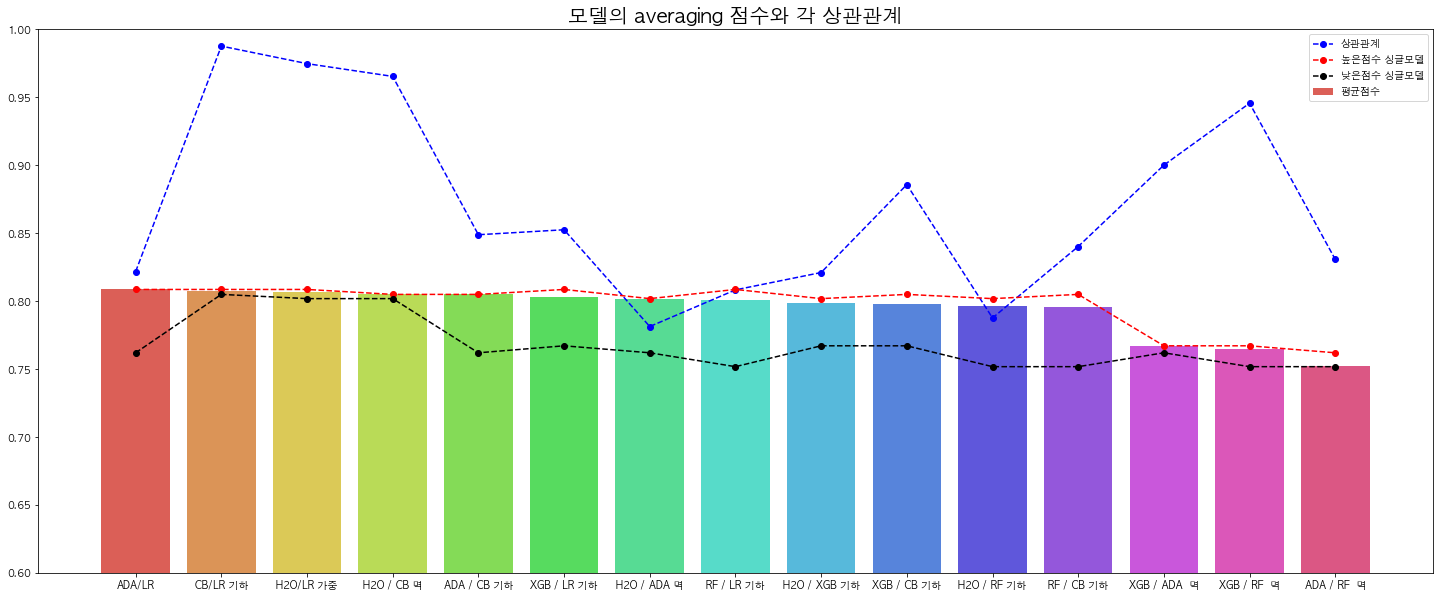

In [271]:
fig = plt.figure(figsize=(25,10))
colors = sns.color_palette('hls',len(ensemble_df["model"]))
plt.bar(ensemble_df["model"], ensemble_df["averaging_score"],label = "평균점수",color=colors) ## 바차트 출력
plt.plot(ensemble_df["model"], ensemble_df["corr_score"], color='b',
         linestyle='--', marker='o',label = "상관관계") ## 선 그래프 출력
plt.plot(ensemble_df["model"], ensemble_df["singlemodel1_score"], color='r',
         linestyle='--', marker='o',label = "높은점수 싱글모델") ## 선 그래프 출력
plt.plot(ensemble_df["model"], ensemble_df["singlemodel2_score"], color='black',
         linestyle='--', marker='o',label = "낮은점수 싱글모델") ## 선 그래프 출력

plt.title('모델의 averaging 점수와 각 상관관계', fontsize=20)   
plt.ylim([0.6, 1])     # Y축의 범위: [ymin, ymax]
plt.legend(loc=0) #범례의 위치
plt.show()

In [272]:
ensemble_df["performance improvement"]=ensemble_df["averaging_score"]-ensemble_df["singlemodel1_score"]
ensemble_df

,model,averaging_score,corr_score,singlemodel1_score,singlemodel2_score,performance improvement
0,ADA/LR,0.80850,0.821648,0.80850,0.76189,0.00000
1,CB/LR 기하,0.80765,0.987576,0.80850,0.80486,-0.00085
2,H2O/LR 가중,0.80682,0.974666,0.80850,0.80175,-0.00168
3,H2O / CB 멱,0.80541,0.965263,0.80486,0.80175,0.00055
4,ADA / CB 기하,0.80486,0.848767,0.80486,0.76189,0.00000
5,XGB / LR 기하,0.80301,0.852424,0.80850,0.76703,-0.00549
6,H2O / ADA 멱,0.80179,0.781209,0.80175,0.76189,0.00004
7,RF / LR 기하,0.80075,0.808179,0.80850,0.75168,-0.00775
8,H2O / XGB 기하,0.79875,0.820947,0.80175,0.76703,-0.00300
9,XGB / CB 기하,0.79788,0.885642,0.80486,0.76703,-0.00698


Text(0.5, 1.0, '모델의 성능향상정도')

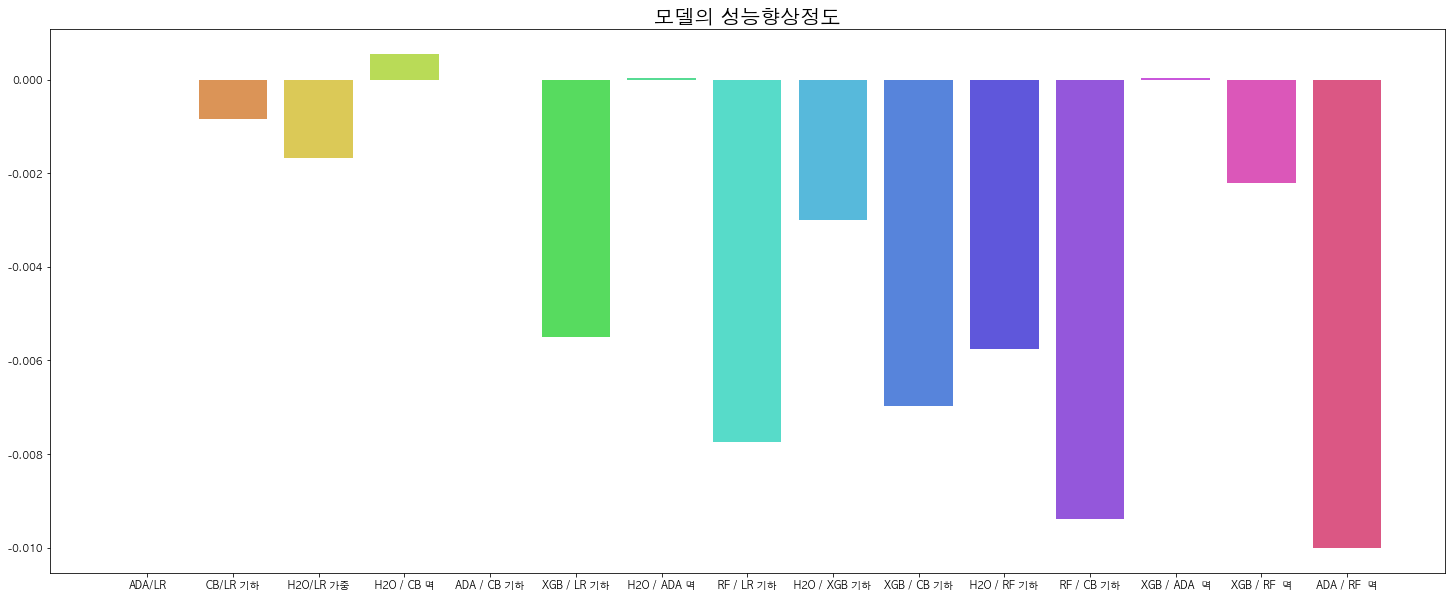

In [275]:
fig = plt.figure(figsize=(25,10))
plt.bar(ensemble_df["model"], ensemble_df["performance improvement"],label = "성능향상",color=colors)
plt.title('모델의 성능향상정도', fontsize=20) 

순수한 스코어  
----1등 : ADA | LR  - > 성능이 가장 좋은 것(1)과 그다음으로 두번째로 상관관계가 낮은(2) 모델 (성능이 각각 1등, 5등)    ->  0.8085  
----2등 : CB | LR -> 성능이 가장 좋은 것(1)과 상관관계가 첫번째로 높은 모델(5) (성능이 각각 1등, 2등)    ->    0.80765  
----3등 : H2O | LR -> 성능이 가장 좋은 것(1)과 상관관계가 두번째로 높은 모델(4) (성능이 각각 1등, 3등).  ->  0.80682   
----4등 : H2O | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 네번째로 낮은(4) 모델 (성능이 각각 2등, 3등)  ->  0.80541   

----하위2위 : XGB | RF  멱  -> 성능이 가장 안좋은것과 상관관계가 가장 높은 모델 (성능이 각각 6등 4등) -> 0.76482  
----꼴지 : ADA | RF  멱  -> 성능이 안좋은 두모델 (성능 각각 6등 5등) - > 0.75188  
 
성능향상 순위  
----4등 : H2O | CB -> 성능이 두번째로 좋은 것(2)과 상관관계가 네번째로 낮은(4) 모델 (성능이 각각 2등, 3등)  ->  0.80541   
